<a href="https://colab.research.google.com/github/MarcoXM/ComputerVision/blob/master/How_to_use_tensorflow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
import tensorflow as tf
tf.__version__
'''
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
tf.__version__

     |████████████████████████████████| 87.9MB 287kB/s 
     |████████████████████████████████| 3.1MB 39.5MB/s 
     |████████████████████████████████| 501kB 46.6MB/s 


'2.0.0-beta1'

### What is tensor

In [0]:
d1 = tf.ones((2,))
d2 = tf.ones((2,2))
d3 = tf.ones((2,2,2))
d4 = tf.ones((2,2,2,2))

In [13]:
print(d1.numpy(),'\n',d2.numpy(),'\n',d3.numpy(),'\n',d4.numpy())

[1. 1.] 
 [[1. 1.]
 [1. 1.]] 
 [[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]] 
 [[[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]


 [[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]]


### Basic operation

In [27]:
from tensorflow import constant,ones_like,multiply

A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = ones_like(A1)
B23 = ones_like(A23)

# Perform element-wise multiplication
C1 = multiply(A1,B1)
C23 = multiply(A23,B23)

# Print the tensors C1 and C23
print(C1.numpy())
print(C23.numpy())

[1 2 3 4]
[[1 2 3]
 [1 6 4]]


### Import the package we will use:


In [0]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,Flatten,Activation
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import utils
import pandas as pd
import matplotlib.pyplot as plt
import random
%notebook inline
def seed_everything(seed):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

In [0]:
seed_everything(6000)

### Data Generation

In [0]:
data_shape = (200, #200 data points
             2) # 2 features
x1 = np.random.normal(0,1,data_shape)+1.5
x2 = -np.random.normal(0,1,data_shape)-1.5
y1 = np.zeros(200)
y2 = np.ones(200)

x = np.concatenate([x1,x2],0)
y = np.concatenate([y1,y2])
ytrian = utils.to_categorical(y,2)

In [22]:
x.shape,y.shape

((400, 2), (400,))

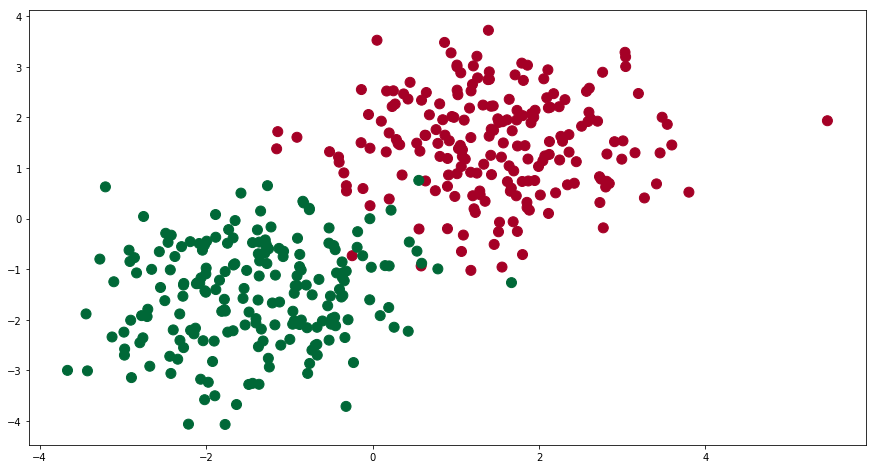

In [23]:
plt.figure(figsize=(15,8))
plt.scatter(x[:, 0], x[:, 1],
            c=y, # color
            s=100, # size
            cmap='RdYlGn')
plt.show()

### Model Building -- High Level Solution

In [24]:
model = Sequential()
model.add(Dense(2,
                input_dim = x.shape[1],
               activation = 'sigmoid'
               ))
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary() 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


Train on 400 samples
Epoch 1/2
400/400 [==============================] - 0s 183us/sample - loss: 0.6868 - accuracy: 0.5700
Epoch 2/2
400/400 [==============================] - 0s 41us/sample - loss: 0.6229 - accuracy: 0.8550


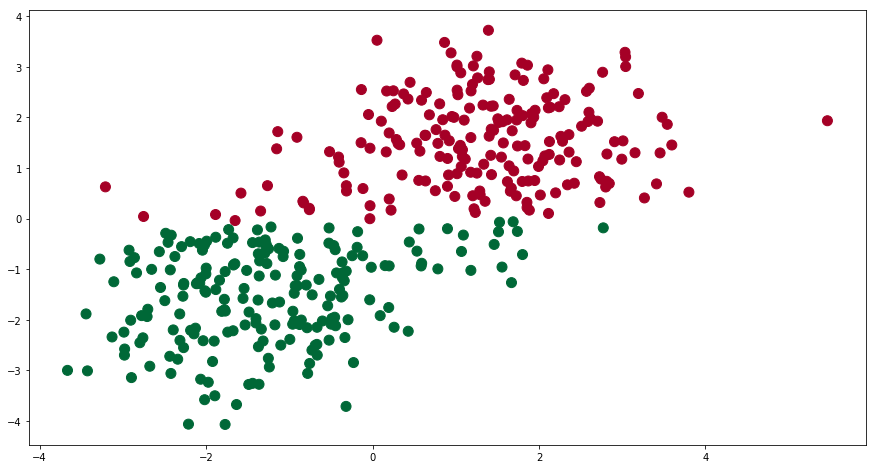

Train on 400 samples
Epoch 1/2
400/400 [==============================] - 0s 92us/sample - loss: 0.5728 - accuracy: 0.9375
Epoch 2/2
400/400 [==============================] - 0s 39us/sample - loss: 0.5317 - accuracy: 0.9600


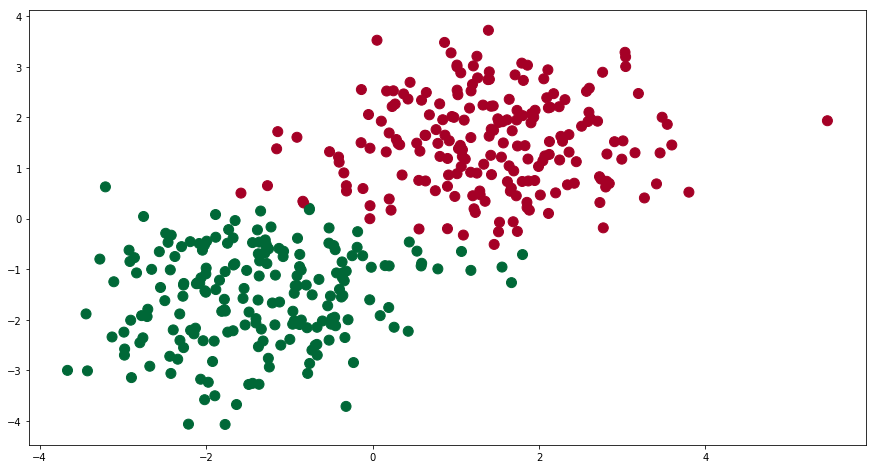

Train on 400 samples
Epoch 1/2
400/400 [==============================] - 0s 64us/sample - loss: 0.4978 - accuracy: 0.9700
Epoch 2/2
400/400 [==============================] - 0s 51us/sample - loss: 0.4693 - accuracy: 0.9725


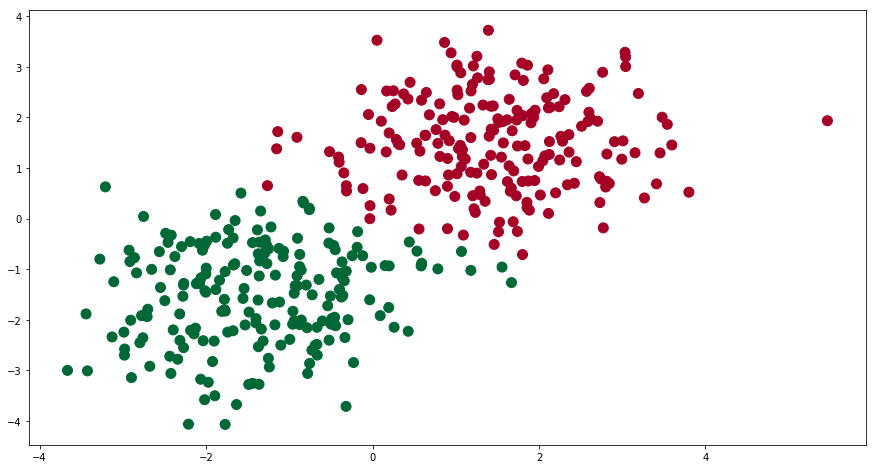

Train on 400 samples
Epoch 1/2
400/400 [==============================] - 0s 84us/sample - loss: 0.4446 - accuracy: 0.9775
Epoch 2/2
400/400 [==============================] - 0s 44us/sample - loss: 0.4231 - accuracy: 0.9775


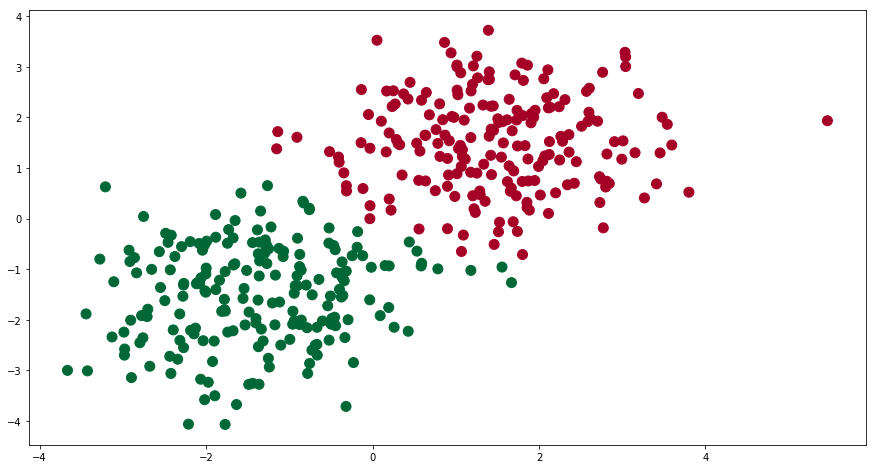

Train on 400 samples
Epoch 1/2
400/400 [==============================] - 0s 80us/sample - loss: 0.4045 - accuracy: 0.9825
Epoch 2/2
400/400 [==============================] - 0s 43us/sample - loss: 0.3878 - accuracy: 0.9850


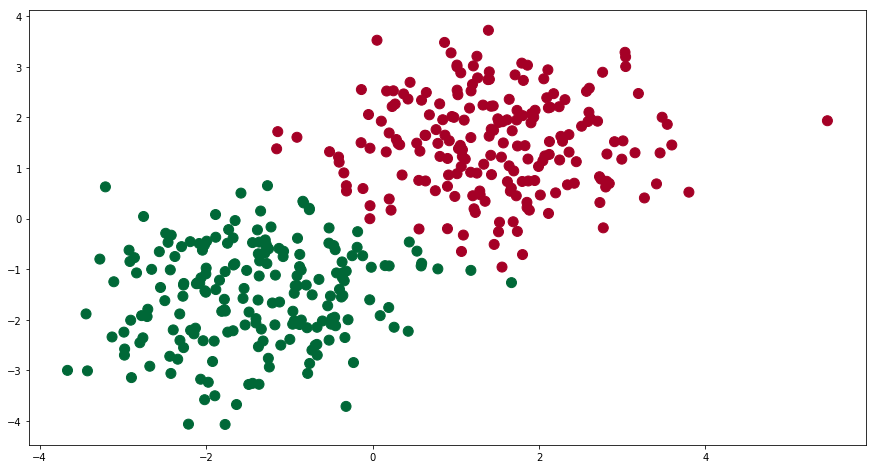

Train on 400 samples
Epoch 1/2
400/400 [==============================] - 0s 82us/sample - loss: 0.3729 - accuracy: 0.9850
Epoch 2/2
400/400 [==============================] - 0s 41us/sample - loss: 0.3594 - accuracy: 0.9850


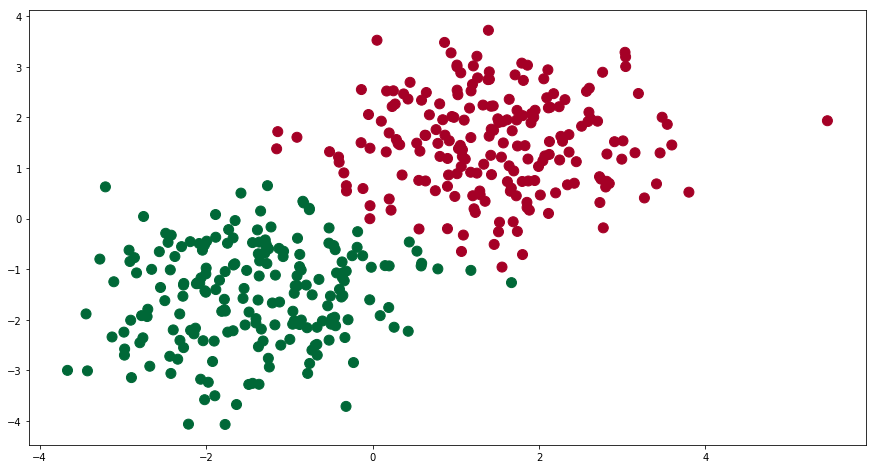

Train on 400 samples
Epoch 1/2
400/400 [==============================] - 0s 51us/sample - loss: 0.3471 - accuracy: 0.9850
Epoch 2/2
400/400 [==============================] - 0s 62us/sample - loss: 0.3359 - accuracy: 0.9850


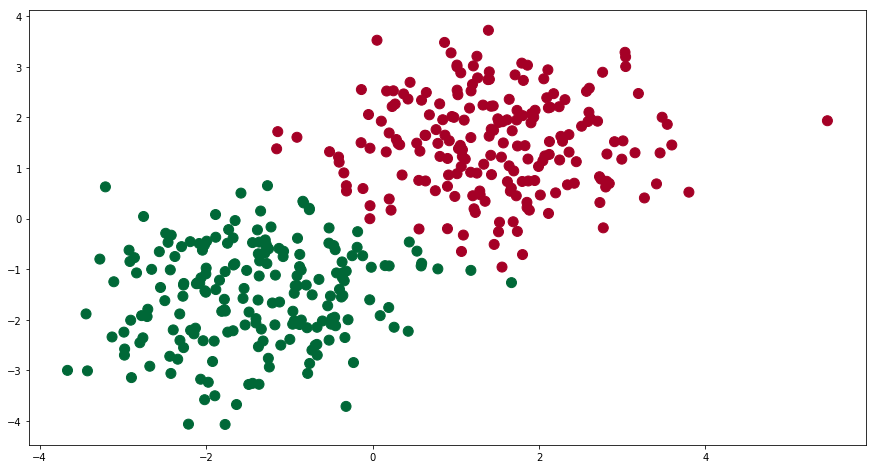

Train on 400 samples
Epoch 1/2
400/400 [==============================] - 0s 48us/sample - loss: 0.3256 - accuracy: 0.9850
Epoch 2/2
400/400 [==============================] - 0s 77us/sample - loss: 0.3160 - accuracy: 0.9850


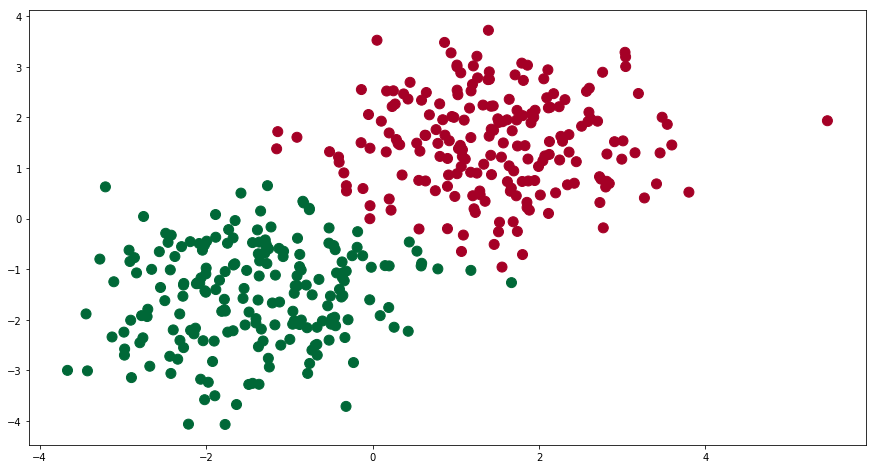

Train on 400 samples
Epoch 1/2
400/400 [==============================] - 0s 56us/sample - loss: 0.3071 - accuracy: 0.9850
Epoch 2/2
400/400 [==============================] - 0s 52us/sample - loss: 0.2988 - accuracy: 0.9825


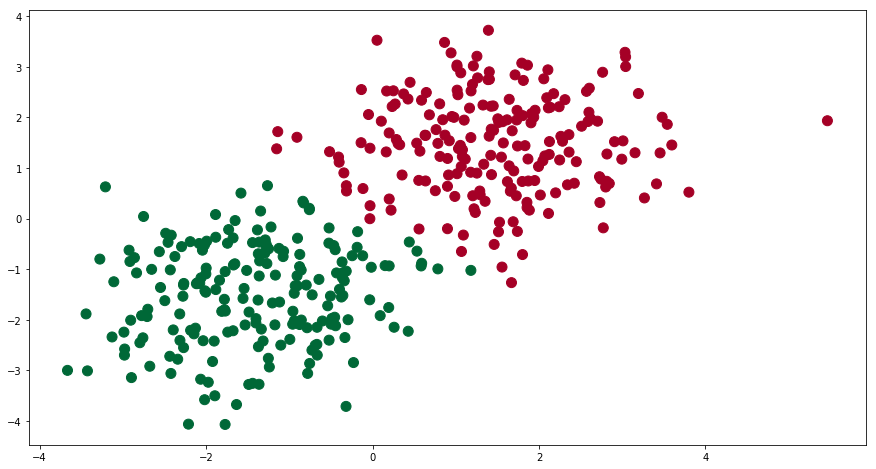

Train on 400 samples
Epoch 1/2
400/400 [==============================] - 0s 56us/sample - loss: 0.2911 - accuracy: 0.9825
Epoch 2/2
400/400 [==============================] - 0s 51us/sample - loss: 0.2838 - accuracy: 0.9825


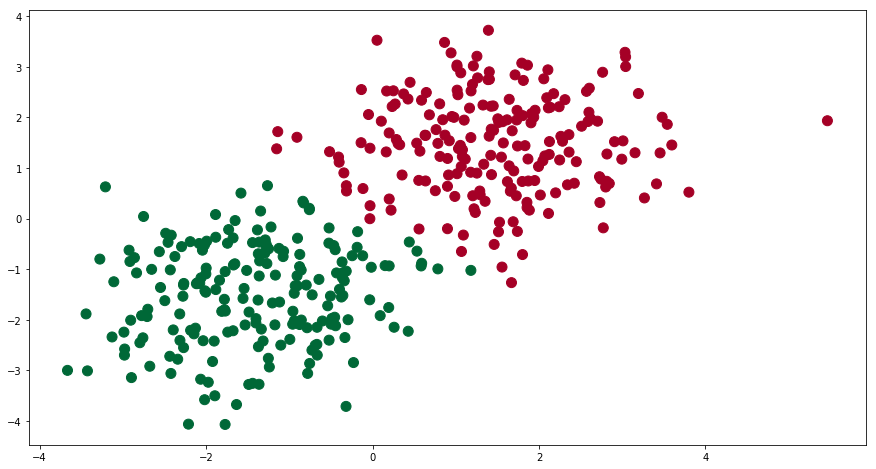

In [25]:
for i in range(10):
    model.fit(x, ytrian, epochs=2, batch_size=32)
    y_pred = model.predict_classes(x)
    plt.figure(figsize=(15,8))
    plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=100, cmap='RdYlGn')
    plt.show()

### Low-Level Solution

In [0]:
### Data to tensor
x_tensor = tf.cast(x,dtype=tf.float32)
y_tensor = tf.cast(y,dtype=tf.float32)

### Parameters initial
w = tf.Variable([[0.1],[-0.1]],dtype=tf.float32)
b = tf.Variable(0.1,dtype=tf.float32)

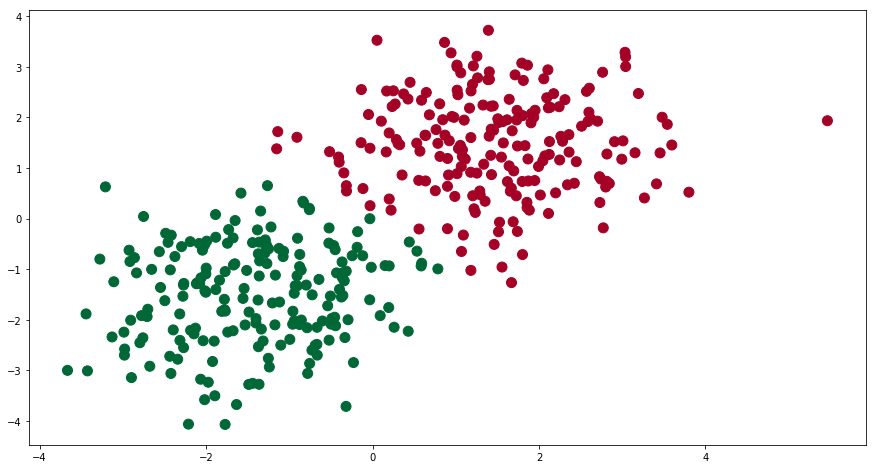

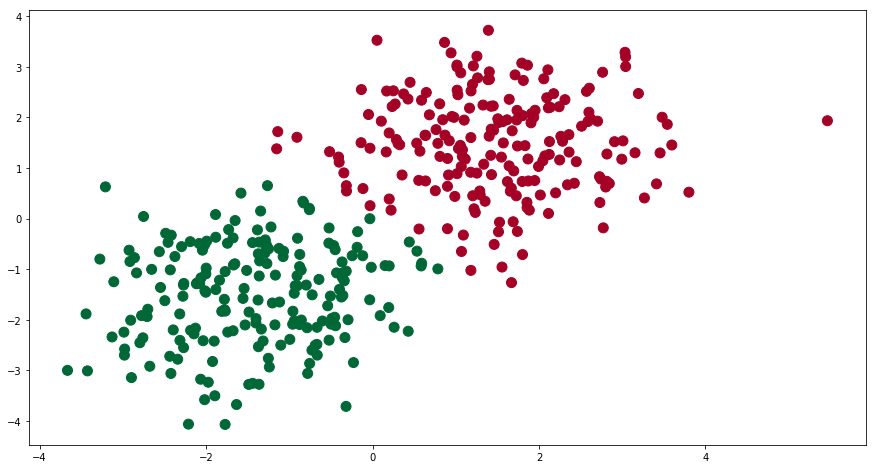

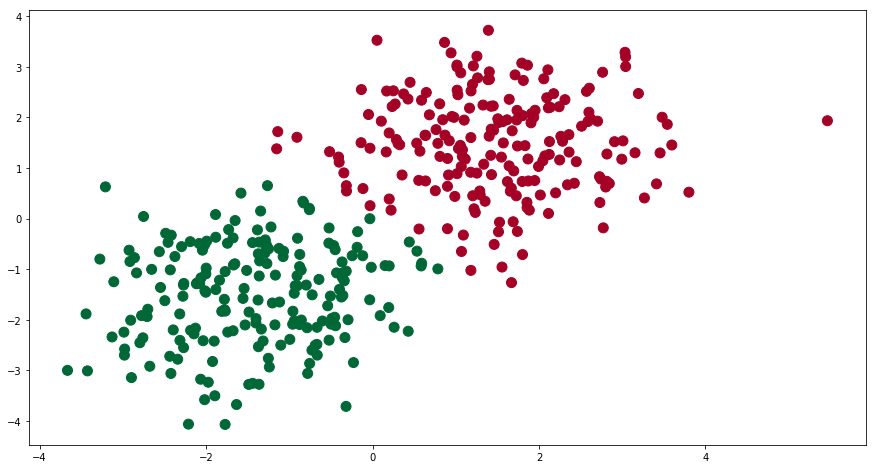

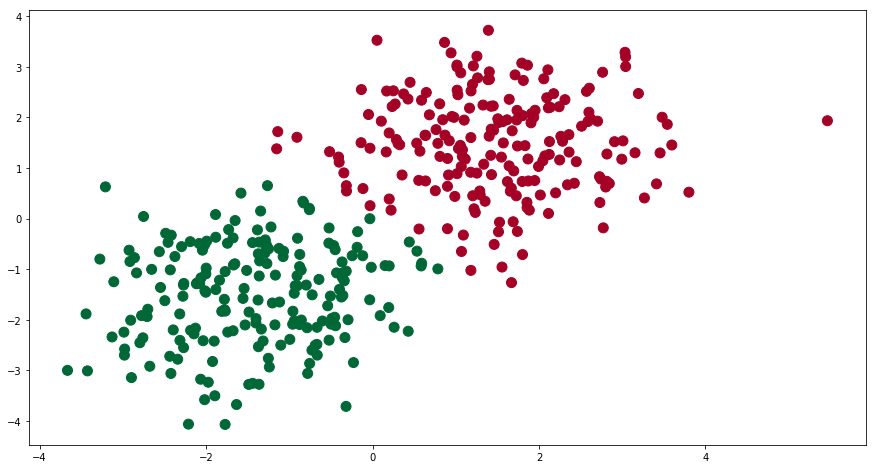

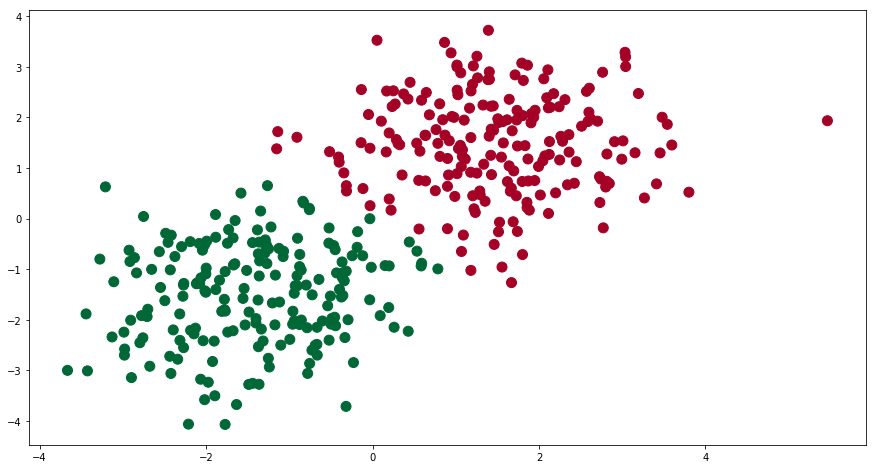

In [83]:
def model(w,x_tensor,b):
    return keras.activations.sigmoid(tf.matmul(x_tensor,w) + b)

def loss_function(w,x,b,target = y_tensor):
    y_pred = model(w,x,b)
    return keras.losses.binary_crossentropy(target,y_pred)
    
opt = keras.optimizers.SGD()

for j in range(100):
    opt.minimize(lambda: loss_function(w,x_tensor,b,y_tensor), var_list=[w,b])
    if j%20 == 0:
        
        y_pro = model(w,x_tensor,b).numpy()
        y_pred = [1 if i >0.5 else 0 for i in y_pro]
        plt.figure(figsize=(15,8))
        plt.scatter(x_tensor.numpy()[:, 0], x_tensor.numpy()[:, 1], c=y_pred, s=100, cmap='RdYlGn')
        plt.show()

